# Exercise 3: Poisson equation on a circle
Consider the Poisson equation on the unit circle
\begin{align}
	\Delta u(x,y) = f(x,y), \qquad x^2+y^2<1.
\end{align}
This is subject to Dirichlet boundary conditions, i.e. 
\begin{align}
	u(x,y) &= 0 \text{ for } x^2+y^2=1.
\end{align}

It is sensible to transform this problem to polar coordinates $(r, \theta)$. We will skip the details of the transformation and immediately rewrite the equation (see Haberman section 7.7.2)
\begin{align}
	\frac{1}{r} \left(r u_r\right)_r + \frac{1}{r^2}u_{\theta\theta} = f(r,\theta), \qquad r<1, \, 0<\theta\leq 2\pi.
\end{align}
subject to
\begin{align}
	u(1, \theta) &= 0.
\end{align}
We need three more boundary conditions (why? draw the domain in $(r, \theta)$ coordinates) at $r=0$, $\theta=0$ and $\theta=2\pi$. Note that these lines are not boundaries in the Cartesian domain but are boundaries in the polar domain. 

As $\theta=0$ and $\theta=2\pi$ indicate the same lines, it makes sense to prescribe the conditions
\begin{align}
	u(r, 0) &= 	u(r, 2\pi), \\
	u_x(r, 0) &= 	u_x(r, 2\pi).	
\end{align}
For the boundary condition for $r=0$ it turns out that it is sufficient to require 
\begin{align}
	|u(0, \theta)| &< \infty, \\
	|u_r(0, \theta)| &< \infty.    
\end{align}

a) Solve this problem using the eigenfunction expansion $u = \sum_{n=1}^\infty a_n(r) \phi_n(\theta)$.
>**Checklist**
>* Follow the same structure as in the previous exercises. Look back at notebook 1 if you need some hints.
>* It is correct if you are left with two integration variables for $\phi_n$ (for each $n$). 
>* The ODE for $a_n(r)$ is an Euler equation. The script below helps you to find the solution, but you still need to apply boundary conditions yourself.

In [81]:
%pip install numpy matplotlib sympy
## This script finds the solution to the Euler equation for a_n(r)
# Imports
import sympy as sp
from IPython.display import display

# Define Sympy variables
r_s, L_s, lam = sp.symbols('r L lambda')
n_s = sp.symbols('n', integer = True, positive=True)
fn, an = sp.symbols('f_n a_n', cls=sp.Function)

# Define and solve ODE
de = r_s*sp.Derivative(r_s*sp.Derivative(an(r_s),r_s,1),r_s,1) - an(r_s)*n_s**2 - r_s**2*fn(r_s)  # COMMENT ON MEANING OF fn
sol_an = sp.dsolve(de, an(r_s)).rhs

# Output
print('Equation:')
display(sp.Eq(de,0))
print('Solution for n unequal to zero:')
display(sp.Eq(an(r_s),sol_an))

# Note that the above solution is invalid for n=0. Consider the solution for n=0:
de0 = sp.Derivative(r_s*sp.Derivative(an(r_s),r_s,1),r_s,1)  - r_s*fn(r_s) 
sol_an0 = sp.dsolve(de0, an(r_s)).rhs

# Output
print('')
print('Equation for n=0:')
display(sp.Eq(de0,0))
print('Solution for n=0:')
display(sp.Eq(an(r_s),sol_an0))

Equation:


Eq(-n**2*a_n(r) - r**2*f_n(r) + r*Derivative(r*Derivative(a_n(r), r), r), 0)

Solution for n unequal to zero:


Eq(a_n(r), C1*r**(-n) + C2*r**n + r**n*Integral(r*r**(-n)*f_n(r), r)/(2*n) - r**(-n)*Integral(r*r**n*f_n(r), r)/(2*n))


Equation for n=0:


Eq(-r*f_n(r) + Derivative(r*Derivative(a_n(r), r), r), 0)

Solution for n=0:


Eq(a_n(r), C1 + C2*log(r) + log(r)*Integral(r*f_n(r), r) - Integral(r*f_n(r)*log(r), r))

b) Write down the final solution for $u(x,y)$. 

We again use a combination of sympy and numpy to get to a visualisation of the results. 

c) Visualise the modes. How do the non-trivial modes depend on $f(r, \theta)$?
>**Checklist**
>* See that there are 'Cosine' modes and 'Sine' modes plotted. These refer to the cosine and sine in the solution for $\phi_n$. Check that you also have these modes in your solution in e).
>* Note that for some functions $f$, the code below may not generate correct results, as the computer does not compute the integrals correctly. Try for example `f = 0.6+sp.cos(theta_s)`. Which modes are not computed corrrectly? As a bonus exercise, can you find out where in the process this goes wrong and why? 

1.0*pi*r

<string>:2: RuntimeWarning: divide by zero encountered in power
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in add
<string>:2: RuntimeWarning: divide by zero encountered in true_divide


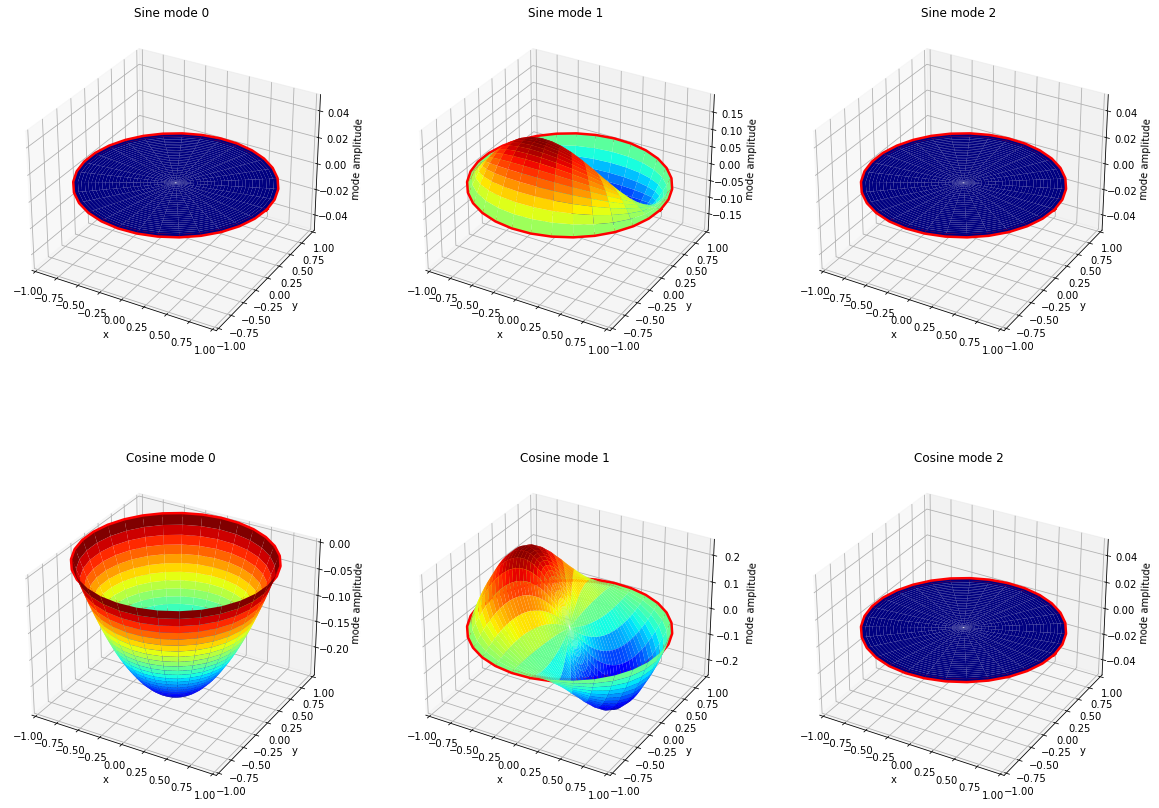

In [144]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Define sympy variables
theta_s, rb = sp.symbols('theta \hat{r}')

# Input
f = 1+3*sp.cos(theta_s) + 4*r_s*sp.sin(theta_s) # f is defined as Sympy object
N=10

# Set numpy arrays
lenr = 30
lentheta = 32
r = np.linspace(0.01,1,lenr).reshape((lenr,1,1))
theta = np.linspace(0,2*np.pi,lentheta).reshape((1,lentheta,1))
n = np.arange(0,N+1).reshape((1,1,N+1))*1.

# Sympy computations
f_n1 = sp.integrate(f*sp.cos(n_s*theta_s),(theta_s,0,2*sp.pi))/sp.integrate(sp.cos(n_s*theta_s)**2,(theta_s,0,2*sp.pi))
f_n2 = sp.integrate(f*sp.sin(n_s*theta_s),(theta_s,0,2*sp.pi))/sp.integrate(sp.sin(n_s*theta_s)**2,(theta_s,0,2*sp.pi))
f_01 = sp.integrate(f,(theta_s,0,2*sp.pi))/(2*sp.pi)

#    Case 1: n not zero
a_n_part_11 = r_s**n_s/(2*n_s)*sp.integrate(rb**(-n_s+1)*f_n1.subs(r_s,rb), (rb,0,r_s))
a_n_part_12 = -r_s**(-n_s)/(2*n_s)*sp.integrate(rb**(n_s+1)*f_n1.subs(r_s,rb), (rb,0,r_s))
a_n_part_21 = r_s**n_s/(2*n_s)*sp.integrate(rb**(-n_s+1)*f_n2.subs(r_s,rb), (rb,0,r_s))
a_n_part_22 = -r_s**(-n_s)/(2*n_s)*sp.integrate(rb**(n_s+1)*f_n2.subs(r_s,rb), (rb,0,r_s))
c_1 = -(a_n_part_11.subs(r_s,1)+a_n_part_12.subs(r_s,1))
c_2 = -(a_n_part_21.subs(r_s,1)+a_n_part_22.subs(r_s,1))
a_n1 = c_1*r_s**n_s + a_n_part_11 + a_n_part_12
a_n2 = c_2*r_s**n_s + a_n_part_21 + a_n_part_22
a_n1fun = sp.lambdify((n_s,r_s), a_n1, modules='numpy')
a_n2fun = sp.lambdify((n_s,r_s), a_n2, modules='numpy')

#    Case 2: n is zero
a_0_part_11 = sp.ln(r_s)*sp.integrate(rb*f_01.subs(r_s,rb), (rb,0,r_s))
a_0_part_12 = -sp.integrate(sp.ln(rb)*rb*f_01.subs(r_s,rb), (rb,0,r_s))
c_3 = sp.integrate(sp.ln(rb)*rb*f_01.subs(r_s,rb), (rb,0,1))
a_01 = c_3 + a_0_part_11 + a_0_part_12
a_01fun = sp.lambdify((r_s), a_01, modules='numpy')

# Transfer to numpy array
an1 = np.zeros((lenr, lentheta, N+1))
an2 = np.zeros((lenr, lentheta, N+1))
an1[:,:,0] = a_01fun(r[:,:,0]) # Mode for n=0
an1[:,:,1:] = a_n1fun(n[:,:,1:],r) # Modes for n not 1
an2[:,:,1:] = a_n2fun(n[:,:,1:],r)

phin1 = np.cos(n*theta)
phin2 = np.sin(n*theta)

# Define modes
mode_n1 = an1*phin1
mode_n2 = an2*phin2

mode1=0 # Mode numbers for plotting
mode2=1
mode3=2

# Plot
R, THETA = np.meshgrid(r, theta)
X, Y = R*np.cos(THETA), R*np.sin(THETA)
xc = np.cos(theta.flatten())
yc = np.sin(theta.flatten())
modes = [mode1, mode2, mode3]
fig = plt.figure(figsize=(20,30))
for q in range(3):
    ax = fig.add_subplot(1, 3, q+1, projection='3d')
    ax.plot_surface(X,Y,mode_n1[:,:,modes[q]].T, cmap='jet')
    ax.plot(xc, yc, zs=0, zdir='z', color='r', linewidth=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mode amplitude')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    plt.title('Cosine mode '+str(modes[q]))
    
    ax = fig.add_subplot(2, 3, q+1, projection='3d')
    ax.plot_surface(X,Y,mode_n2[:,:,modes[q]].T, cmap='jet')
    ax.plot(xc, yc, zs=0, zdir='z', color='r', linewidth=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('mode amplitude')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    plt.title('Sine mode '+str(modes[q]))

plt.show()

d) Have a look at the total solution. Change the forcing $f(r,\theta)$ in the code above, e.g. to $\cos(\theta)$, $\sin(\theta)$ and any other function you like.

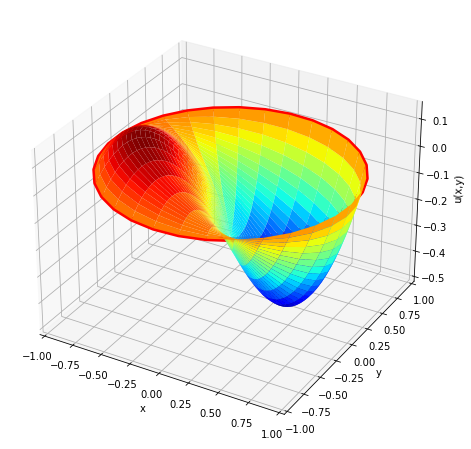

In [145]:
fig = plt.figure(figsize=(20,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,np.sum(mode_n1+mode_n2,axis=2).T, cmap='jet')
ax.plot(xc, yc, zs=0, zdir='z', color='r', linewidth=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

plt.show()

*Bonus exercise*) What would happen if we started with the eigenfunction expansion $u = \sum_{n=1}^\infty a_n(\theta) \phi_n(r)$? 
>**Checklist**
>* What eigenvalue problem would you need to define for $\phi_n$? Before solving the eigenvalue problem, try to substitute it in the PDE and see if you can derive an ODE for $a_n$ that does not depend on $r$ anymore. If this does not work, change your definition of the eigenvalue problem and try again.
>* Is the eigenvalue problem for $\phi_n$ a Sturm-Liouville problem? The singularity at $r=0$ is not necessarily a problem (e.g. see Haberman section 7.7.3). 
>* Solve the eigenvalue problem. Use the code below to help you. Consider the cases where the eigenvalue is positive and negative (change the code where needed). Apply the boundary conditions yourself. For what eigenvalues do nontrivial solutions exist. 
>* Are the solutions for $\phi_n$ an orthogonal set? Try to compute $\int_0^r \phi_n(r) \phi_k(r) dr$ to check this. What does this imply.

In [22]:
import sympy as sp
from IPython.display import display

# Define symbols
r_s, L_s = sp.symbols('r L')
lam = sp.symbols('lambda', positive=True) # we can set conditions on lambda here.
# lam = sp.symbols('lambda', negative=True) # we can set conditions on lambda here.
n = sp.symbols('n', integer = True, positive=True)
phi_n = sp.symbols('\phi_n', cls=sp.Function)

# Define differential equation and solve
de = r_s*sp.Derivative(r_s*sp.Derivative(phi_n(r_s),r_s,1),r_s,1) + phi_n(r_s)*lam
sol_an = sp.dsolve(de, phi_n(r_s)).rhs

print('Equation:')
display(sp.Eq(de,0))
print('Solution:')
display(sp.Eq(phi_n(r_s),sol_an))


Equation:


Eq(lambda*\phi_n(r) + r*Derivative(r*Derivative(\phi_n(r), r), r), 0)

Solution:


Eq(\phi_n(r), C1*sin(sqrt(lambda)*log(r)) + C2*cos(sqrt(lambda)*log(r)))